<a href="https://colab.research.google.com/github/Akshay4729/Regression-ML-Models/blob/main/Life_expectancy_Linear_Regression_1_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Required Libs**

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import math
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn import metrics

**Importing DataSet**


In [ ]:
df=pd.read_excel("/content/Life Expectancy Data (1).xlsx")

In [ ]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
df.shape

(2938, 22)

In [ ]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

# **EDA**

In [ ]:
df['Life expectancy']=df['Life expectancy'].fillna(value=df['Life expectancy'].mean())

In [ ]:
df['Adult Mortality']=df['Adult Mortality'].fillna(value=df['Adult Mortality'].mean())

In [ ]:
df['Adult Mortality'] = df['Adult Mortality'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   int64  
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
df['Alcohol']=df['Alcohol'].fillna(value=df['Alcohol'].mean())

In [ ]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
df['Hepatitis B']=df['Hepatitis B'].fillna(value=df['Hepatitis B'].mean())

In [ ]:
df.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df['BMI']=df['BMI'].fillna(value=df['BMI'].mean())

In [ ]:
df['Polio'].unique()

array([ 6., 58., 62., 67., 68., 66., 63., 64.,  5., 41., 36., 35., 24.,
       99., 98., 97., 95., 94., 92., 88., 86., 87., 89.,  7., 75., 73.,
       81., 65., 39.,  4., 37.,  3., 96., 93., 91., 85.,  9., 83., 84.,
       82., 71.,  8., 79., 78., 77., 53., 74., 76., 69., 45., 72., 54.,
       59., 61., 57., 47., 23., 46., 44., 42., 38., 52., 51., 43., 32.,
       49., 31., 26., 17., 55., 48., 56., nan, 33.])

In [ ]:
df['Polio']=df['Polio'].fillna(value=df['Polio'].mean())

In [ ]:
df['Polio'] = df['Polio'].astype(int)

In [ ]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
BMI                                  0
under-five deaths                    0
Polio                                0
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
df['Total expenditure']=df['Total expenditure'].fillna(value=df['Total expenditure'].mean())

In [ ]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
BMI                                  0
under-five deaths                    0
Polio                                0
Total expenditure                    0
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
df['Diphtheria']=df['Diphtheria'].fillna(value=df['Diphtheria'].mean())

In [ ]:
df['GDP'].unique()

array([584.25921  , 612.696514 , 631.744976 , ...,  57.34834  ,
       548.587312 , 547.3588785])

In [ ]:
df['GDP']=df['GDP'].fillna(value=df['GDP'].mean())

In [ ]:
df['Population']=df['Population'].fillna(value=df['Population'].mean())

In [ ]:
df['thinness  1-19 years'].value_counts()

1.0     74
1.9     65
0.8     64
0.7     63
1.2     62
        ..
16.5     1
16.7     1
16.9     1
17.1     1
15.8     1
Name: thinness  1-19 years, Length: 200, dtype: int64

In [ ]:
df['thinness  1-19 years']=df['thinness  1-19 years'].fillna(value=df['thinness  1-19 years'].mean())

In [ ]:
df['thinness 5-9 years']=df['thinness 5-9 years'].fillna(value=df['thinness 5-9 years'].mean())

In [ ]:
df['Income composition of resources'].value_counts()

0.000    130
0.700     17
0.739     13
0.714     12
0.636     12
        ... 
0.933      1
0.930      1
0.925      1
0.347      1
0.460      1
Name: Income composition of resources, Length: 625, dtype: int64

In [ ]:
df['Income composition of resources']=df['Income composition of resources'].fillna(value=df['Income composition of resources'].mean())

In [ ]:
df['Schooling']=df['Schooling'].fillna(value=df['Schooling'].mean())

In [ ]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65.0,1154,...,6,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62.0,492,...,58,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64.0,430,...,62,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67.0,2787,...,67,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68.0,3013,...,68,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65.0,1154,...,6,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62.0,492,...,58,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64.0,430,...,62,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67.0,2787,...,67,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68.0,3013,...,68,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df['thinness  1-19 years'] = df['thinness  1-19 years'].astype(int)

In [ ]:
df['thinness 5-9 years'] = df['thinness 5-9 years'].astype(int)

In [ ]:
df['GDP'] = df['GDP'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   int64  
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [ ]:
df['Status'] = df['Status'].replace({'Developing': 0, 'Developed': 1})

In [ ]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,0,65.0,263,62,0.01,71.279624,65.0,1154,...,6,8.16,65.0,0.1,584,33736494.0,17,17,0.479,10.1
1,Afghanistan,2014,0,59.9,271,64,0.01,73.523582,62.0,492,...,58,8.18,62.0,0.1,612,327582.0,17,17,0.476,10.0
2,Afghanistan,2013,0,59.9,268,66,0.01,73.219243,64.0,430,...,62,8.13,64.0,0.1,631,31731688.0,17,17,0.470,9.9
3,Afghanistan,2012,0,59.5,272,69,0.01,78.184215,67.0,2787,...,67,8.52,67.0,0.1,669,3696958.0,17,18,0.463,9.8
4,Afghanistan,2011,0,59.2,275,71,0.01,7.097109,68.0,3013,...,68,7.87,68.0,0.1,63,2978599.0,18,18,0.454,9.5


In [ ]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "CÃ´te d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany

In [ ]:
df.groupby('Country')['Life expectancy'].mean().round(0).astype(int).reset_index(name='Avg')

,Country,Avg
0,Afghanistan,58
1,Albania,75
2,Algeria,74
3,Angola,49
4,Antigua and Barbuda,75
...,...,...
188,Venezuela (Bolivarian Republic of),73
189,Viet Nam,75
190,Yemen,64
191,Zambia,54


In [ ]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,0,65.0,263,62,0.01,71.279624,65.0,1154,...,6,8.16,65.0,0.1,584,33736494.0,17,17,0.479,10.1
1,Afghanistan,2014,0,59.9,271,64,0.01,73.523582,62.0,492,...,58,8.18,62.0,0.1,612,327582.0,17,17,0.476,10.0
2,Afghanistan,2013,0,59.9,268,66,0.01,73.219243,64.0,430,...,62,8.13,64.0,0.1,631,31731688.0,17,17,0.470,9.9
3,Afghanistan,2012,0,59.5,272,69,0.01,78.184215,67.0,2787,...,67,8.52,67.0,0.1,669,3696958.0,17,18,0.463,9.8
4,Afghanistan,2011,0,59.2,275,71,0.01,7.097109,68.0,3013,...,68,7.87,68.0,0.1,63,2978599.0,18,18,0.454,9.5


In [ ]:
year_wise_life_expectancy=df.groupby('Year')['Life expectancy'].mean().astype(int).reset_index(name='Avg')
year_wise_life_expectancy

,Year,Avg
0,2000,66
1,2001,67
2,2002,67
3,2003,67
4,2004,67
5,2005,68
6,2006,68
7,2007,69
8,2008,69
9,2009,69


In [ ]:
#fig = plt.figure(figsize =(8, 6))
#plt.bar(year_wise_life_expectancy['Year'].head(10), year_wise_life_expectancy['Life expectancy'].head(10))
#plt.show()

# **Correlation between columns**

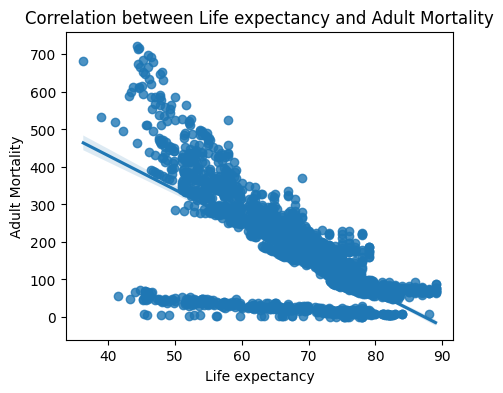

In [ ]:
fig=plt.figure(figsize=(5,4))
sns.regplot(x='Life expectancy',y='Adult Mortality',data=df)
plt.title('Correlation between Life expectancy and Adult Mortality')
plt.show()

In [ ]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,0,65.0,263,62,0.01,71.279624,65.0,1154,...,6,8.16,65.0,0.1,584,33736494.0,17,17,0.479,10.1
1,Afghanistan,2014,0,59.9,271,64,0.01,73.523582,62.0,492,...,58,8.18,62.0,0.1,612,327582.0,17,17,0.476,10.0
2,Afghanistan,2013,0,59.9,268,66,0.01,73.219243,64.0,430,...,62,8.13,64.0,0.1,631,31731688.0,17,17,0.470,9.9
3,Afghanistan,2012,0,59.5,272,69,0.01,78.184215,67.0,2787,...,67,8.52,67.0,0.1,669,3696958.0,17,18,0.463,9.8
4,Afghanistan,2011,0,59.2,275,71,0.01,7.097109,68.0,3013,...,68,7.87,68.0,0.1,63,2978599.0,18,18,0.454,9.5


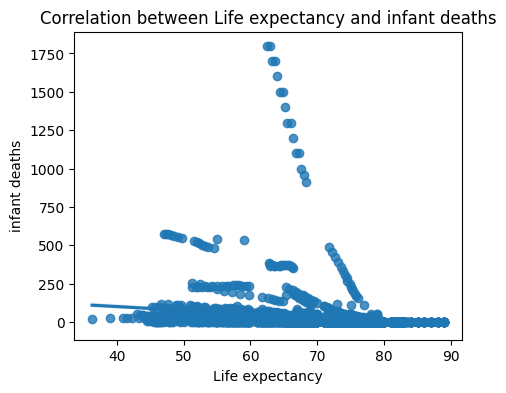

In [ ]:
fig=plt.figure(figsize=(5,4))
sns.regplot(x='Life expectancy',y='infant deaths',data=df)
plt.title('Correlation between Life expectancy and infant deaths')
plt.show()

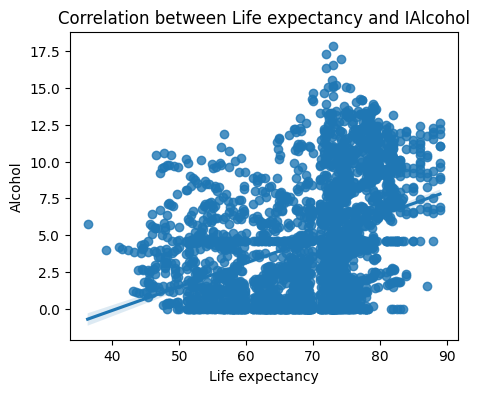

In [ ]:
fig=plt.figure(figsize=(5,4))
sns.regplot(x='Life expectancy',y='Alcohol',data=df)
plt.title('Correlation between Life expectancy and IAlcohol')
plt.show()

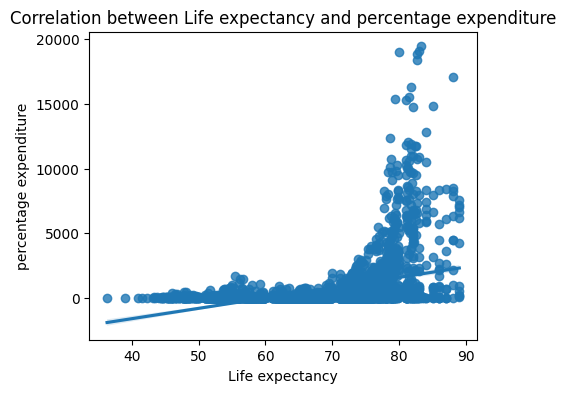

In [ ]:
fig=plt.figure(figsize=(5,4))
sns.regplot(x='Life expectancy',y='percentage expenditure',data=df)
plt.title('Correlation between Life expectancy and percentage expenditure')
plt.show()

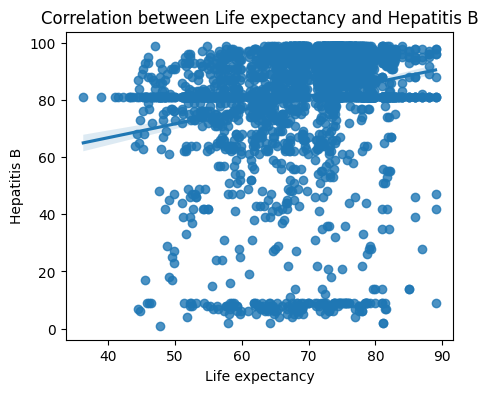

In [ ]:
fig=plt.figure(figsize=(5,4))
sns.regplot(x='Life expectancy',y='Hepatitis B',data=df)
plt.title('Correlation between Life expectancy and Hepatitis B')
plt.show()

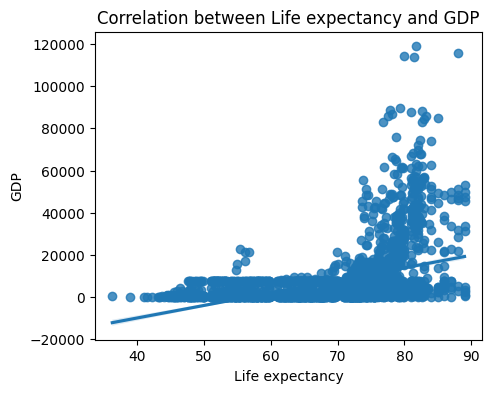

In [ ]:
fig=plt.figure(figsize=(5,4))
sns.regplot(x='Life expectancy',y='GDP',data=df)
plt.title('Correlation between Life expectancy and GDP')
plt.show()

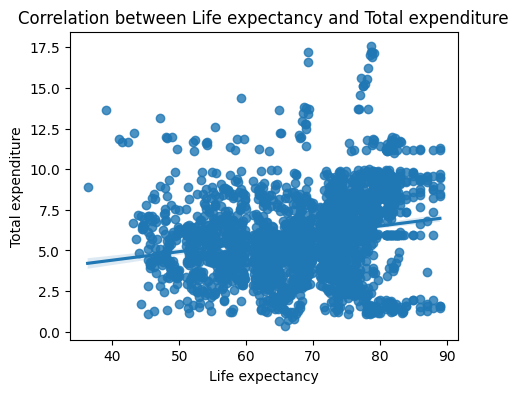

In [ ]:
fig=plt.figure(figsize=(5,4))
sns.regplot(x='Life expectancy',y='Total expenditure',data=df)
plt.title('Correlation between Life expectancy and Total expenditure')
plt.show()

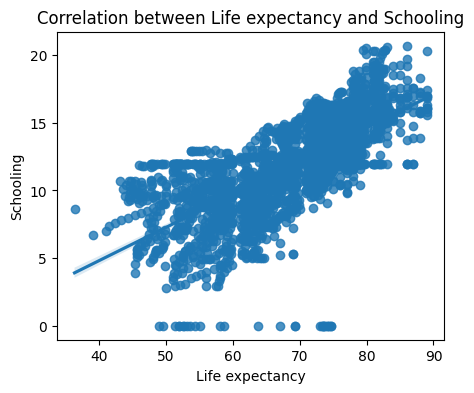

In [ ]:
fig=plt.figure(figsize=(5,4))
sns.regplot(x='Life expectancy',y='Schooling',data=df)
plt.title('Correlation between Life expectancy and Schooling')
plt.show()

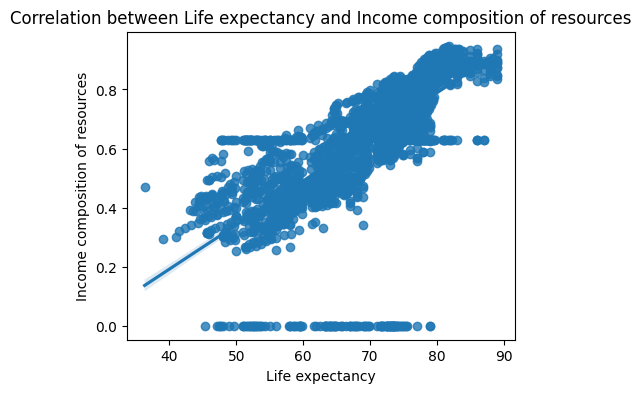

In [ ]:
fig=plt.figure(figsize=(5,4))
sns.regplot(x='Life expectancy',y='Income composition of resources',data=df)
plt.title('Correlation between Life expectancy and Income composition of resources')
plt.show()

In [ ]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

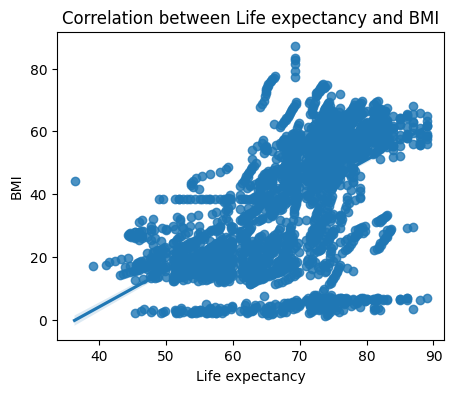

In [ ]:
fig=plt.figure(figsize=(5,4))
sns.regplot(x='Life expectancy',y='BMI',data=df)
plt.title('Correlation between Life expectancy and BMI')
plt.show()

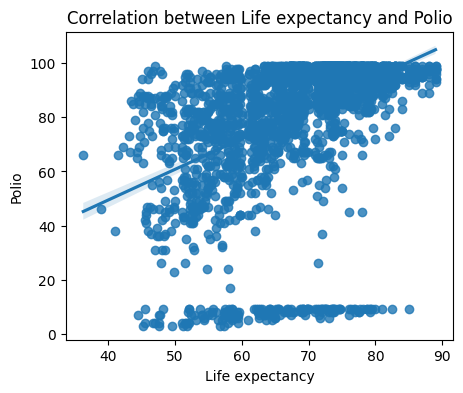

In [ ]:
fig=plt.figure(figsize=(5,4))
sns.regplot(x='Life expectancy',y='Polio',data=df)
plt.title('Correlation between Life expectancy and Polio')
plt.show()

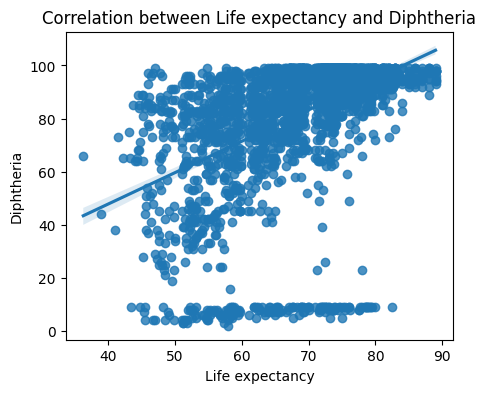

In [ ]:
fig=plt.figure(figsize=(5,4))
sns.regplot(x='Life expectancy',y='Diphtheria',data=df)
plt.title('Correlation between Life expectancy and Diphtheria')
plt.show()

In [ ]:
df.head(20)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,0,65.0,263,62,0.01,71.279624,65.0,1154,...,6,8.16,65.0,0.1,584,33736494.0,17,17,0.479,10.1
1,Afghanistan,2014,0,59.9,271,64,0.01,73.523582,62.0,492,...,58,8.18,62.0,0.1,612,327582.0,17,17,0.476,10.0
2,Afghanistan,2013,0,59.9,268,66,0.01,73.219243,64.0,430,...,62,8.13,64.0,0.1,631,31731688.0,17,17,0.470,9.9
3,Afghanistan,2012,0,59.5,272,69,0.01,78.184215,67.0,2787,...,67,8.52,67.0,0.1,669,3696958.0,17,18,0.463,9.8
4,Afghanistan,2011,0,59.2,275,71,0.01,7.097109,68.0,3013,...,68,7.87,68.0,0.1,63,2978599.0,18,18,0.454,9.5
5,Afghanistan,2010,0,58.8,279,74,0.01,79.679367,66.0,1989,...,66,9.20,66.0,0.1,553,2883167.0,18,18,0.448,9.2
6,Afghanistan,2009,0,58.6,281,77,0.01,56.762217,63.0,2861,...,63,9.42,63.0,0.1,445,284331.0,18,18,0.434,8.9
7,Afghanistan,2008,0,58.1,287,80,0.03,25.873925,64.0,1599,...,64,8.33,64.0,0.1,373,2729431.0,18,18,0.433,8.7
8,Afghanistan,2007,0,57.5,295,82,0.02,10.910156,63.0,1141,...,63,6.73,63.0,0.1,369,26616792.0,19,19,0.415,8.4
9,Afghanistan,2006,0,57.3,295,84,0.03,17.171518,64.0,1990,...,58,7.43,58.0,0.1,272,2589345.0,19,19,0.405,8.1


In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['Country']=label_encoder.fit_transform(df['Country'])

In [ ]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,0,65.0,263,62,0.01,71.279624,65.0,1154,...,6,8.16,65.0,0.1,584,33736494.0,17,17,0.479,10.1
1,0,2014,0,59.9,271,64,0.01,73.523582,62.0,492,...,58,8.18,62.0,0.1,612,327582.0,17,17,0.476,10.0
2,0,2013,0,59.9,268,66,0.01,73.219243,64.0,430,...,62,8.13,64.0,0.1,631,31731688.0,17,17,0.470,9.9
3,0,2012,0,59.5,272,69,0.01,78.184215,67.0,2787,...,67,8.52,67.0,0.1,669,3696958.0,17,18,0.463,9.8
4,0,2011,0,59.2,275,71,0.01,7.097109,68.0,3013,...,68,7.87,68.0,0.1,63,2978599.0,18,18,0.454,9.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   int64  
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   int64  
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   int64  
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

**Correlation between the columns**

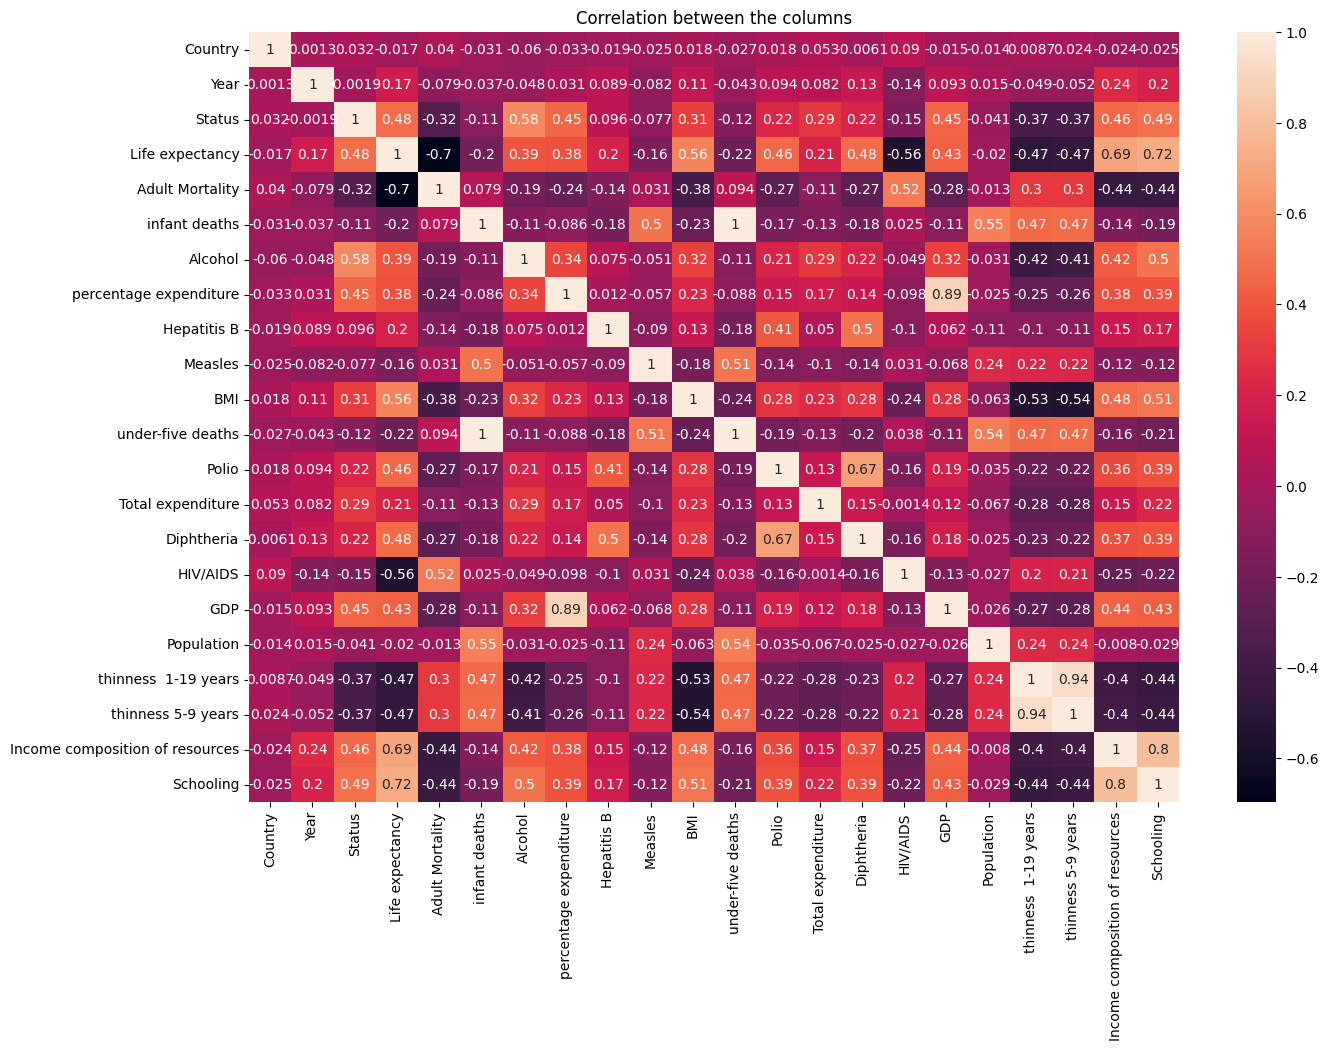

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation between the columns')
plt.show()

# **Linear Regression**

In [ ]:
dependend_vairalble=df['Life expectancy']
dependend_vairalble

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy, Length: 2938, dtype: float64

In [ ]:
df.drop(columns=['Life expectancy'],inplace=True)

In [ ]:
independend_vairalble=df
independend_vairalble

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,0,263,62,0.01,71.279624,65.0,1154,19.1,...,6,8.16,65.0,0.1,584,33736494.0,17,17,0.479,10.1
1,0,2014,0,271,64,0.01,73.523582,62.0,492,18.6,...,58,8.18,62.0,0.1,612,327582.0,17,17,0.476,10.0
2,0,2013,0,268,66,0.01,73.219243,64.0,430,18.1,...,62,8.13,64.0,0.1,631,31731688.0,17,17,0.470,9.9
3,0,2012,0,272,69,0.01,78.184215,67.0,2787,17.6,...,67,8.52,67.0,0.1,669,3696958.0,17,18,0.463,9.8
4,0,2011,0,275,71,0.01,7.097109,68.0,3013,17.2,...,68,7.87,68.0,0.1,63,2978599.0,18,18,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,0,723,27,4.36,0.000000,68.0,31,27.1,...,67,7.13,65.0,33.6,454,12777511.0,9,9,0.407,9.2
2934,192,2003,0,715,26,4.06,0.000000,7.0,998,26.7,...,7,6.52,68.0,36.7,453,12633897.0,9,9,0.418,9.5
2935,192,2002,0,73,25,4.43,0.000000,73.0,304,26.3,...,73,6.53,71.0,39.8,57,125525.0,1,1,0.427,10.0
2936,192,2001,0,686,25,1.72,0.000000,76.0,529,25.9,...,76,6.16,75.0,42.1,548,12366165.0,1,1,0.427,9.8


In [ ]:
x=independend_vairalble
y=dependend_vairalble

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train[:10]

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
683,42,2005,1,65,0,11.41,1562.520827,88.000000,1,55.3,...,98,6.37,98.0,0.1,25324,1.276580e+05,0,1,0.826000,13.500000
478,28,2001,0,273,25,1.71,27.689711,80.940461,3761,12.4,...,59,5.70,6.0,2.2,321,1.242473e+06,11,11,0.412000,7.600000
2359,155,2001,1,124,0,10.80,196.302624,80.940461,0,51.8,...,93,8.57,92.0,0.1,1479,1.992600e+04,2,2,0.824000,14.700000
971,62,2006,0,288,3,2.93,0.000000,95.000000,0,21.5,...,94,5.52,95.0,3.0,7483,1.275338e+07,9,8,0.415000,8.100000
880,56,2001,0,225,0,0.01,88.629458,80.940461,0,54.3,...,94,4.85,94.0,0.1,4498,1.388115e+06,2,2,0.781000,15.000000
1830,119,2014,1,58,1,0.01,1491.703605,92.000000,140,61.6,...,96,1.90,96.0,0.1,52157,1.686580e+05,1,0,0.923000,18.100000
2779,183,2014,0,34,86,0.01,0.000000,97.000000,88,23.2,...,97,5.58,97.0,1.4,7483,1.275338e+07,6,6,0.627551,11.992793
1370,87,2007,0,356,66,1.97,59.833614,81.000000,1516,17.3,...,76,4.80,81.0,9.1,839,3.885990e+05,8,8,0.494000,10.100000
1477,94,2012,0,513,4,0.01,168.134899,95.000000,179,3.8,...,93,11.14,95.0,9.0,1281,2.899280e+05,6,6,0.479000,11.000000
2450,161,2006,0,145,4,1.96,120.247171,98.000000,0,17.2,...,98,4.60,98.0,0.1,1448,1.952000e+03,15,15,0.718000,13.100000


In [ ]:
scalar=MinMaxScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [ ]:
x_train[:10]

array([[2.18750000e-01, 3.33333333e-01, 1.00000000e+00, 8.86426593e-02,
        0.00000000e+00, 6.71378092e-01, 8.02119054e-02, 8.86597938e-01,
        4.71291291e-06, 6.29200463e-01, 0.00000000e+00, 9.89583333e-01,
        3.48229832e-01, 9.89690722e-01, 0.00000000e+00, 2.18754319e-01,
        1.08185160e-04, 0.00000000e+00, 3.57142857e-02, 8.71308017e-01,
        6.52173913e-01],
       [1.45833333e-01, 6.66666667e-02, 0.00000000e+00, 3.76731302e-01,
        1.38888889e-02, 1.00117786e-01, 1.42144949e-03, 8.13819188e-01,
        1.77252655e-02, 1.32097335e-01, 1.32000000e-02, 5.83333333e-01,
        3.09344167e-01, 4.12371134e-02, 4.15841584e-02, 2.76434001e-03,
        1.05319894e-03, 4.07407407e-01, 3.92857143e-01, 4.34599156e-01,
        3.67149758e-01],
       [8.07291667e-01, 6.66666667e-02, 1.00000000e+00, 1.70360111e-01,
        0.00000000e+00, 6.35453475e-01, 1.00771825e-02, 8.13819188e-01,
        0.00000000e+00, 5.88644264e-01, 0.00000000e+00, 9.37500000e-01,
        4.7591

In [ ]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
regressor.intercept_

54.7867049760801

In [ ]:
regressor.coef_

array([   0.85382798,   -0.20378077,    1.49068944,  -14.24493333,
        184.24239923,    1.14398437,    1.70132349,   -1.49532527,
         -4.57283249,    4.08361012, -192.28100663,    2.89164468,
          1.8911968 ,    3.83087103,  -23.26698856,    4.09436949,
          1.61178522,   -2.58931876,    0.65720689,    5.7686482 ,
         12.28854511])

In [ ]:
y_pred_train=regressor.predict(x_train)

In [ ]:
y_train[:10]

683     78.7
478     58.5
2359    76.2
971     58.2
880     78.0
1830    81.7
2779    67.0
1370    56.8
1477    52.2
2450    73.8
Name: Life expectancy, dtype: float64

In [ ]:
y_pred_train[:10].round(0)

array([79., 57., 77., 61., 72., 82., 71., 57., 56., 70.])

In [ ]:
y_pred=regressor.predict(x_test)

In [ ]:
y_test

867     77.3
1780    66.6
621     52.6
2715    61.5
2717    60.0
        ... 
1290    81.3
2724    53.2
392     72.6
27      73.0
674     83.0
Name: Life expectancy, Length: 588, dtype: float64

In [ ]:
y_pred[:10].round(0)

array([77., 66., 53., 67., 60., 62., 71., 79., 71., 47.])

In [ ]:
print("mean_absolute_error",(metrics.mean_absolute_error(y_pred_train,y_train)))
print("mean_squared_error",(metrics.mean_squared_error(y_pred_train,y_train)))

mean_absolute_error 3.0205086071950844
mean_squared_error 16.2759842281719


In [ ]:
r2_score(y_train,y_pred_train)

0.8193927139401531

In [ ]:
print("mean_absolute_error",(metrics.mean_absolute_error(y_pred,y_test)))
print("mean_squared_error",(metrics.mean_squared_error(y_pred,y_test)))

mean_absolute_error 2.9923970104739976
mean_squared_error 16.210853510726373


In [ ]:
r2_score(y_test,y_pred)

0.8219398405825933

**Actual vs prdicted  Life Expectancy**

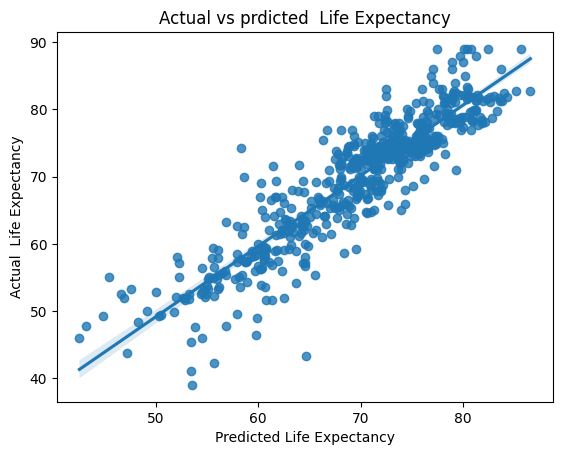

In [ ]:
sns.regplot(x=y_pred,y=y_test)
plt.xlabel("Predicted Life Expectancy")
plt.ylabel("Actual  Life Expectancy")
plt.title("Actual vs prdicted  Life Expectancy")
plt.show()

# **Ridge And Lasso**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,50,55,100]}
ridge_regressor=GridSearchCV(ridge,params,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
ridge_regressor.best_params_

{'alpha': 0.001}

In [ ]:
ridge_regressor.best_score_

-16.589402607358963

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,50,55,100]}
lasso_regressor=GridSearchCV(lasso,params,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.565e+04, tolerance: 1.727e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.520e+04, tolerance: 1.649e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.518e+04, tolerance: 1.692e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
lasso_regressor.best_score_

-16.591250020872895

In [ ]:
lasso_regressor.best_params_

{'alpha': 1e-08}

In [ ]:
y_pred=regressor.predict(x_test)
from sklearn.metrics import r2_score
r2_score=r2_score(y_pred,y_test)
print(r2_score)

0.761786219758539


# **Adjusted R2 Squar**

In [ ]:
n = x.shape[0]
p = x.shape[1]
adj_r2 = 1-(1-r2_score)*((n-1)/(n-p-1))

In [ ]:
print('Adjusted R-squared score',adj_r2*100)

Adjusted R-squared score 76.00706884193515
